# Case study #1 – Invest & Prosper



### Context

Overall, investing in stocks can help meet life's financial aspirations. However, it is difficult to determine the worth of a stock, and doing the same for a multitude of stocks to identify the right picks can be tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better examine stocks across different market segments and protect against risks. 


### Objective

Invest & Prosper is a financial consultancy firm that provides their customers with personalized investment strategies. You are a business analyst with them and have access to data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. Your task is to  analyze the data, carry out clustering of the stocks based on the attributes provided, and share insights about the profile of each cluster and the business recommendation.

### Data Dictionary
* Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
* Company: Name of the company
* GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
* GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
* Current Price: Current stock price in dollars
* Price Change: Percentage change in the stock price in 13 weeks
* Volatility: Standard deviation of the stock price over the past 13 weeks
* ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
* Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to itstotal current liabilities
* Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
* Net Income: Revenues minus expenses, interest, and taxes (in dollars)
* Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
* Estimated Shares Outstanding: Company's stock currently held by all its shareholders
* P/E Ratio: Ratio of the company's current stock price to the earnings per share
* P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)


In [92]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [93]:
#lets load the data set using that 
df = pd.read_csv('/Users/harshchandak/Downloads/stock_data.csv')
df.shape

(340, 15)

### it has 340 rows and 15 columns 

### Data Preprocessing task:
checking for null values and dropping or changing the null variables 


In [96]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [97]:
# copying the data to another variable to avoid any changes to original data
df_stock= df.copy()

In [98]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [99]:
# checking for missing values
df_stock.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

#### no null values we can procedd with the data set 

In [101]:
df_stock.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


we can see a few things in the data set 
* price change has a std dev of 12.00 % which is realtively low
* highest current price is 1274 and min price is 4.5 saying it consists different sizes of companies

### EDA_Univariate analysis 
#### Slicing the dataframe to extract only numerical columns

In [104]:
num_col=df_stock.select_dtypes(include=np.number)

## Function to plot histogram and boxplot together

Current Price


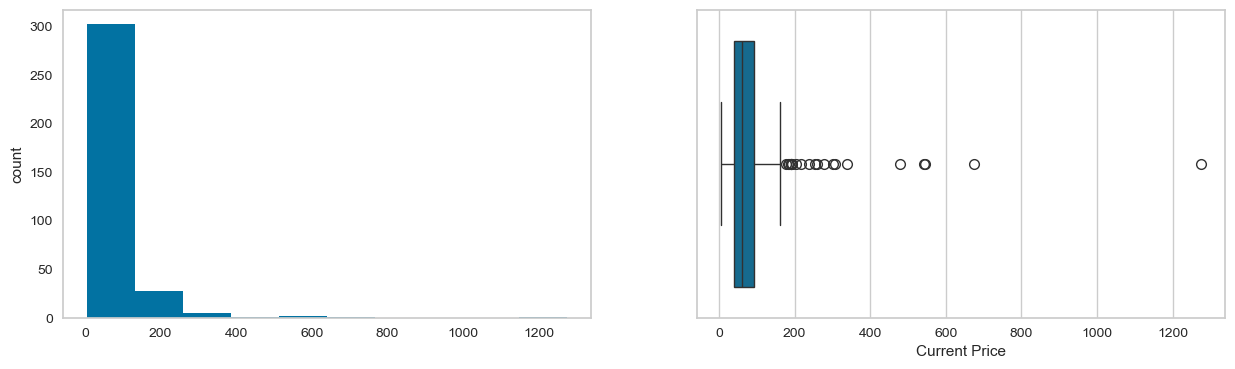

Price Change


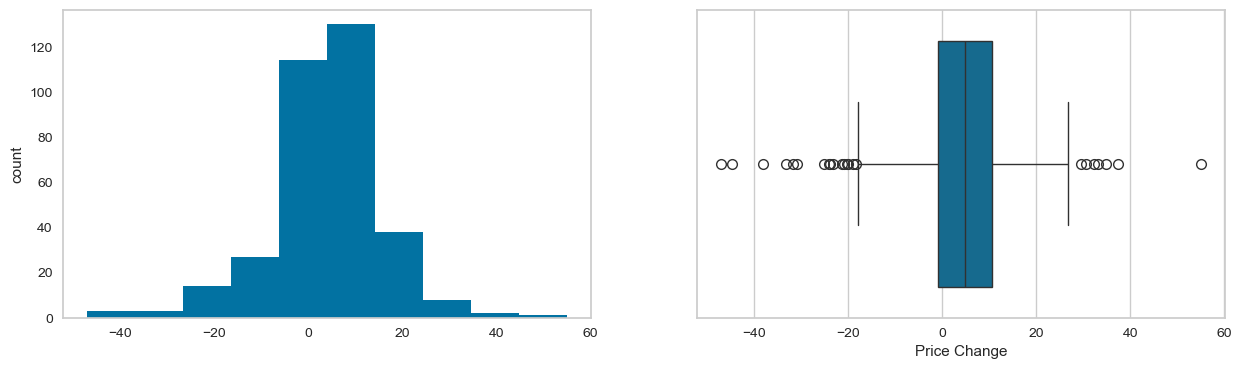

Volatility


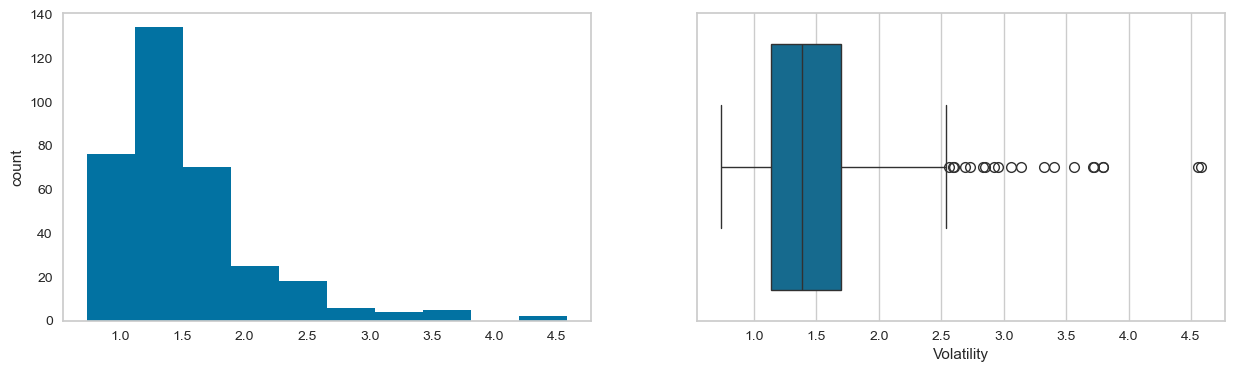

ROE


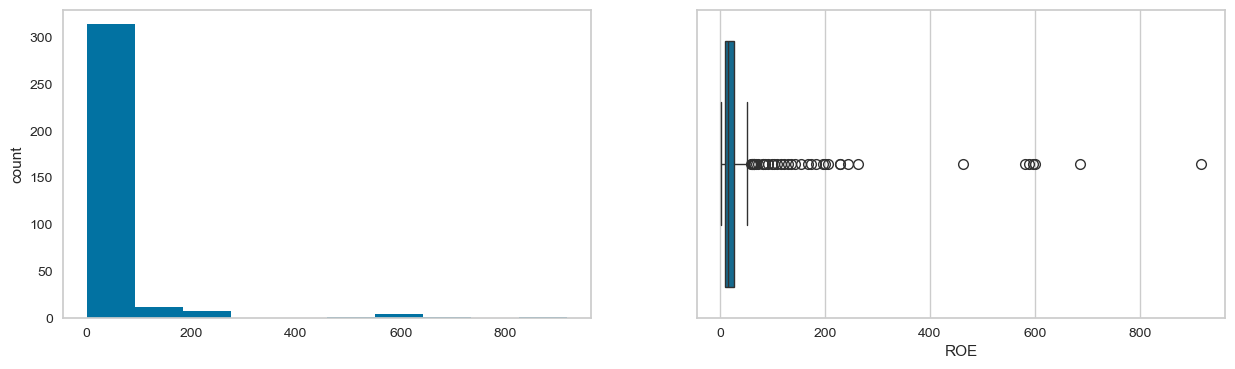

Cash Ratio


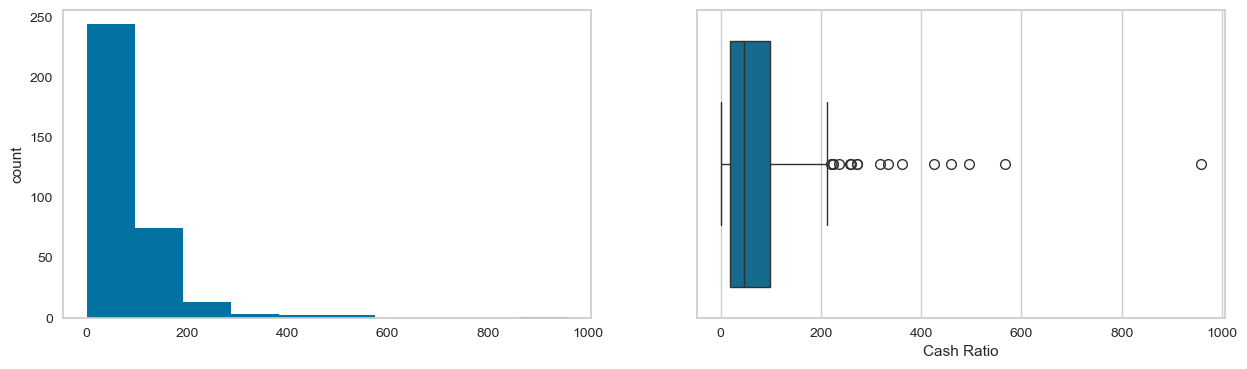

Net Cash Flow


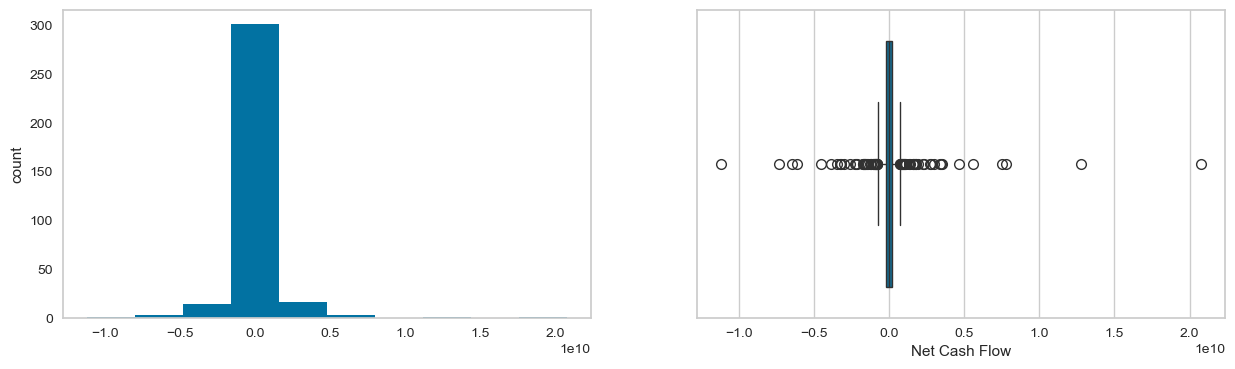

Net Income


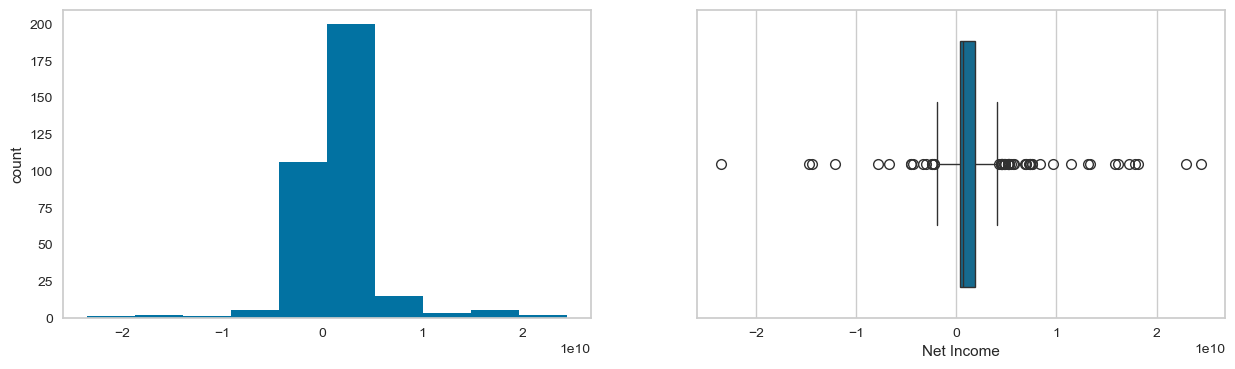

Earnings Per Share


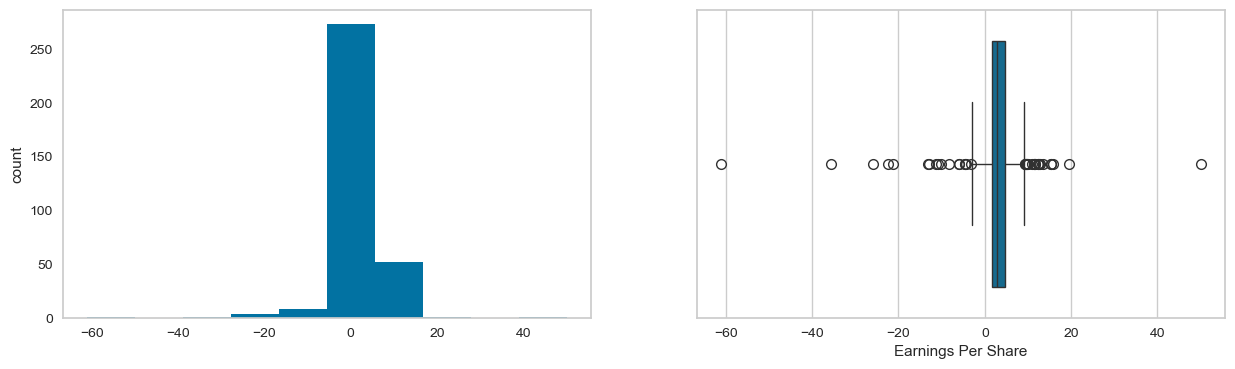

Estimated Shares Outstanding


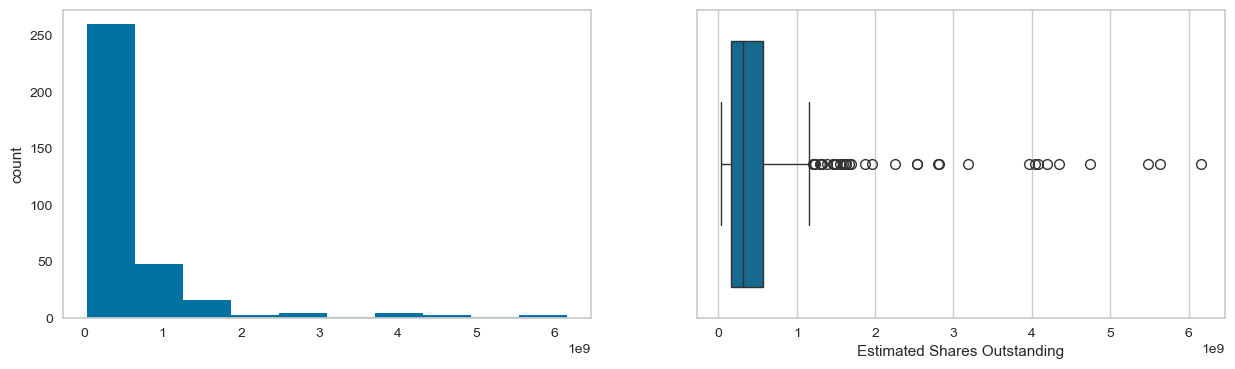

P/E Ratio


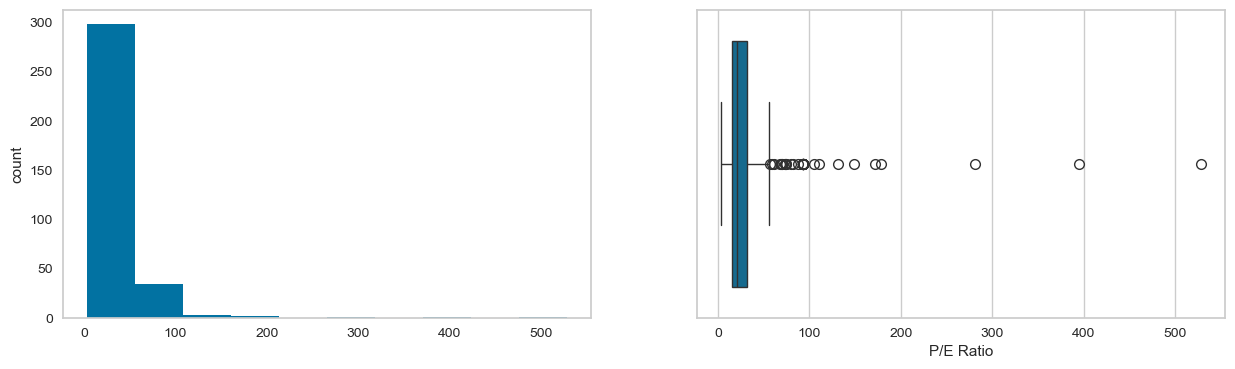

P/B Ratio


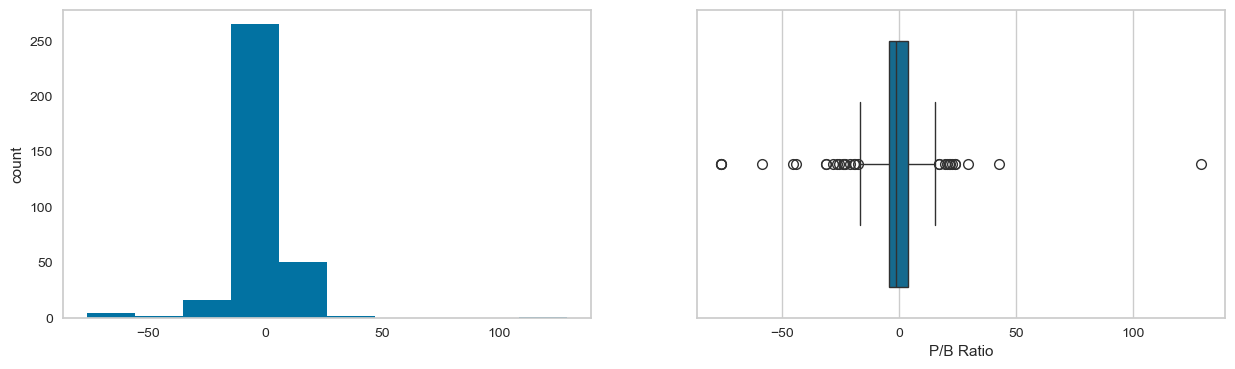

In [106]:
for col in num_col.columns:
    print(col)
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    num_col[col].hist(bins=10, grid=False)
    plt.ylabel("count")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=num_col[col])
    plt.show()

* most of the companies have low share prices and almost all numerical variables have outliers 
* price change is normally distributed 


## Bi-variate analysis 

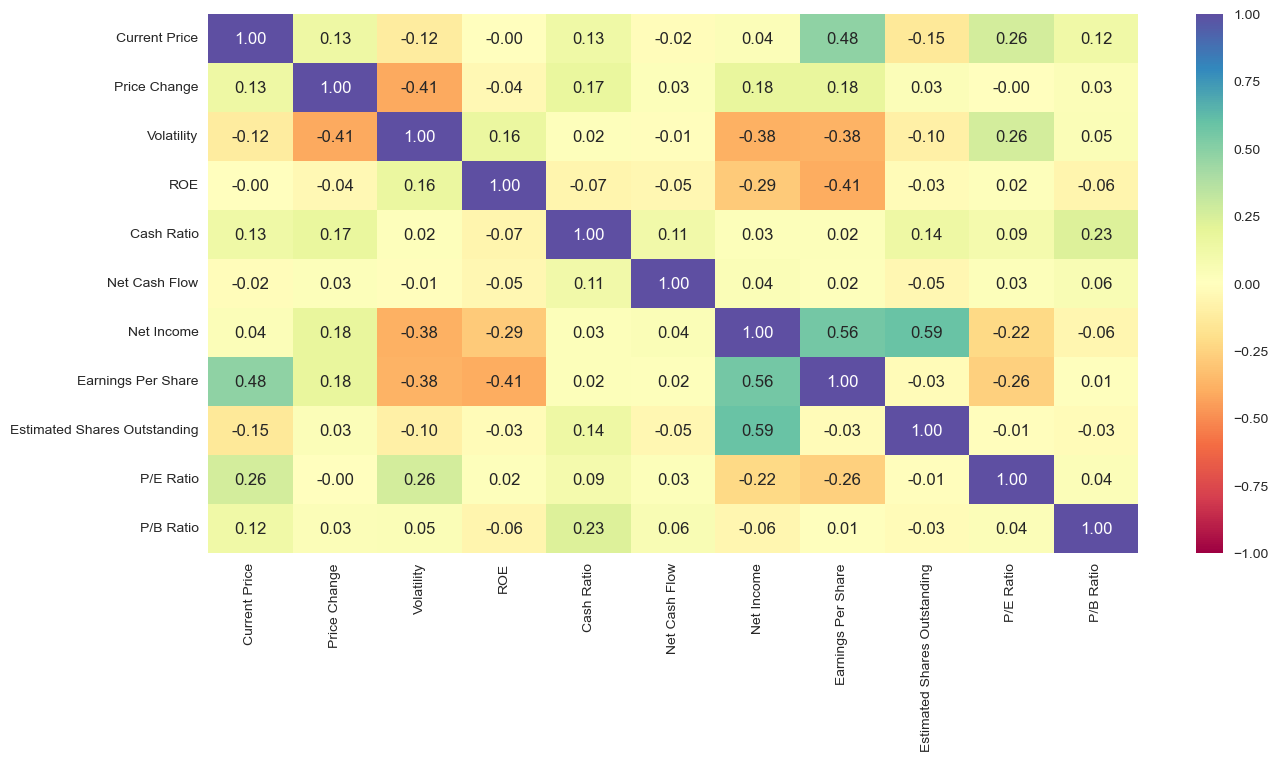

In [109]:
# slicing the dataset to contain only numerical columns and looking at the heatmap to see the multi collinarity


plt.figure(figsize=(15, 7))
sns.heatmap(num_col.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* we can see a strong correaltion between estimated shares outstanding and net income(.59)
* also a strong correaltion between net income and earnings per share (.56)
* earnings per share and current price share a high correlation too (.48)

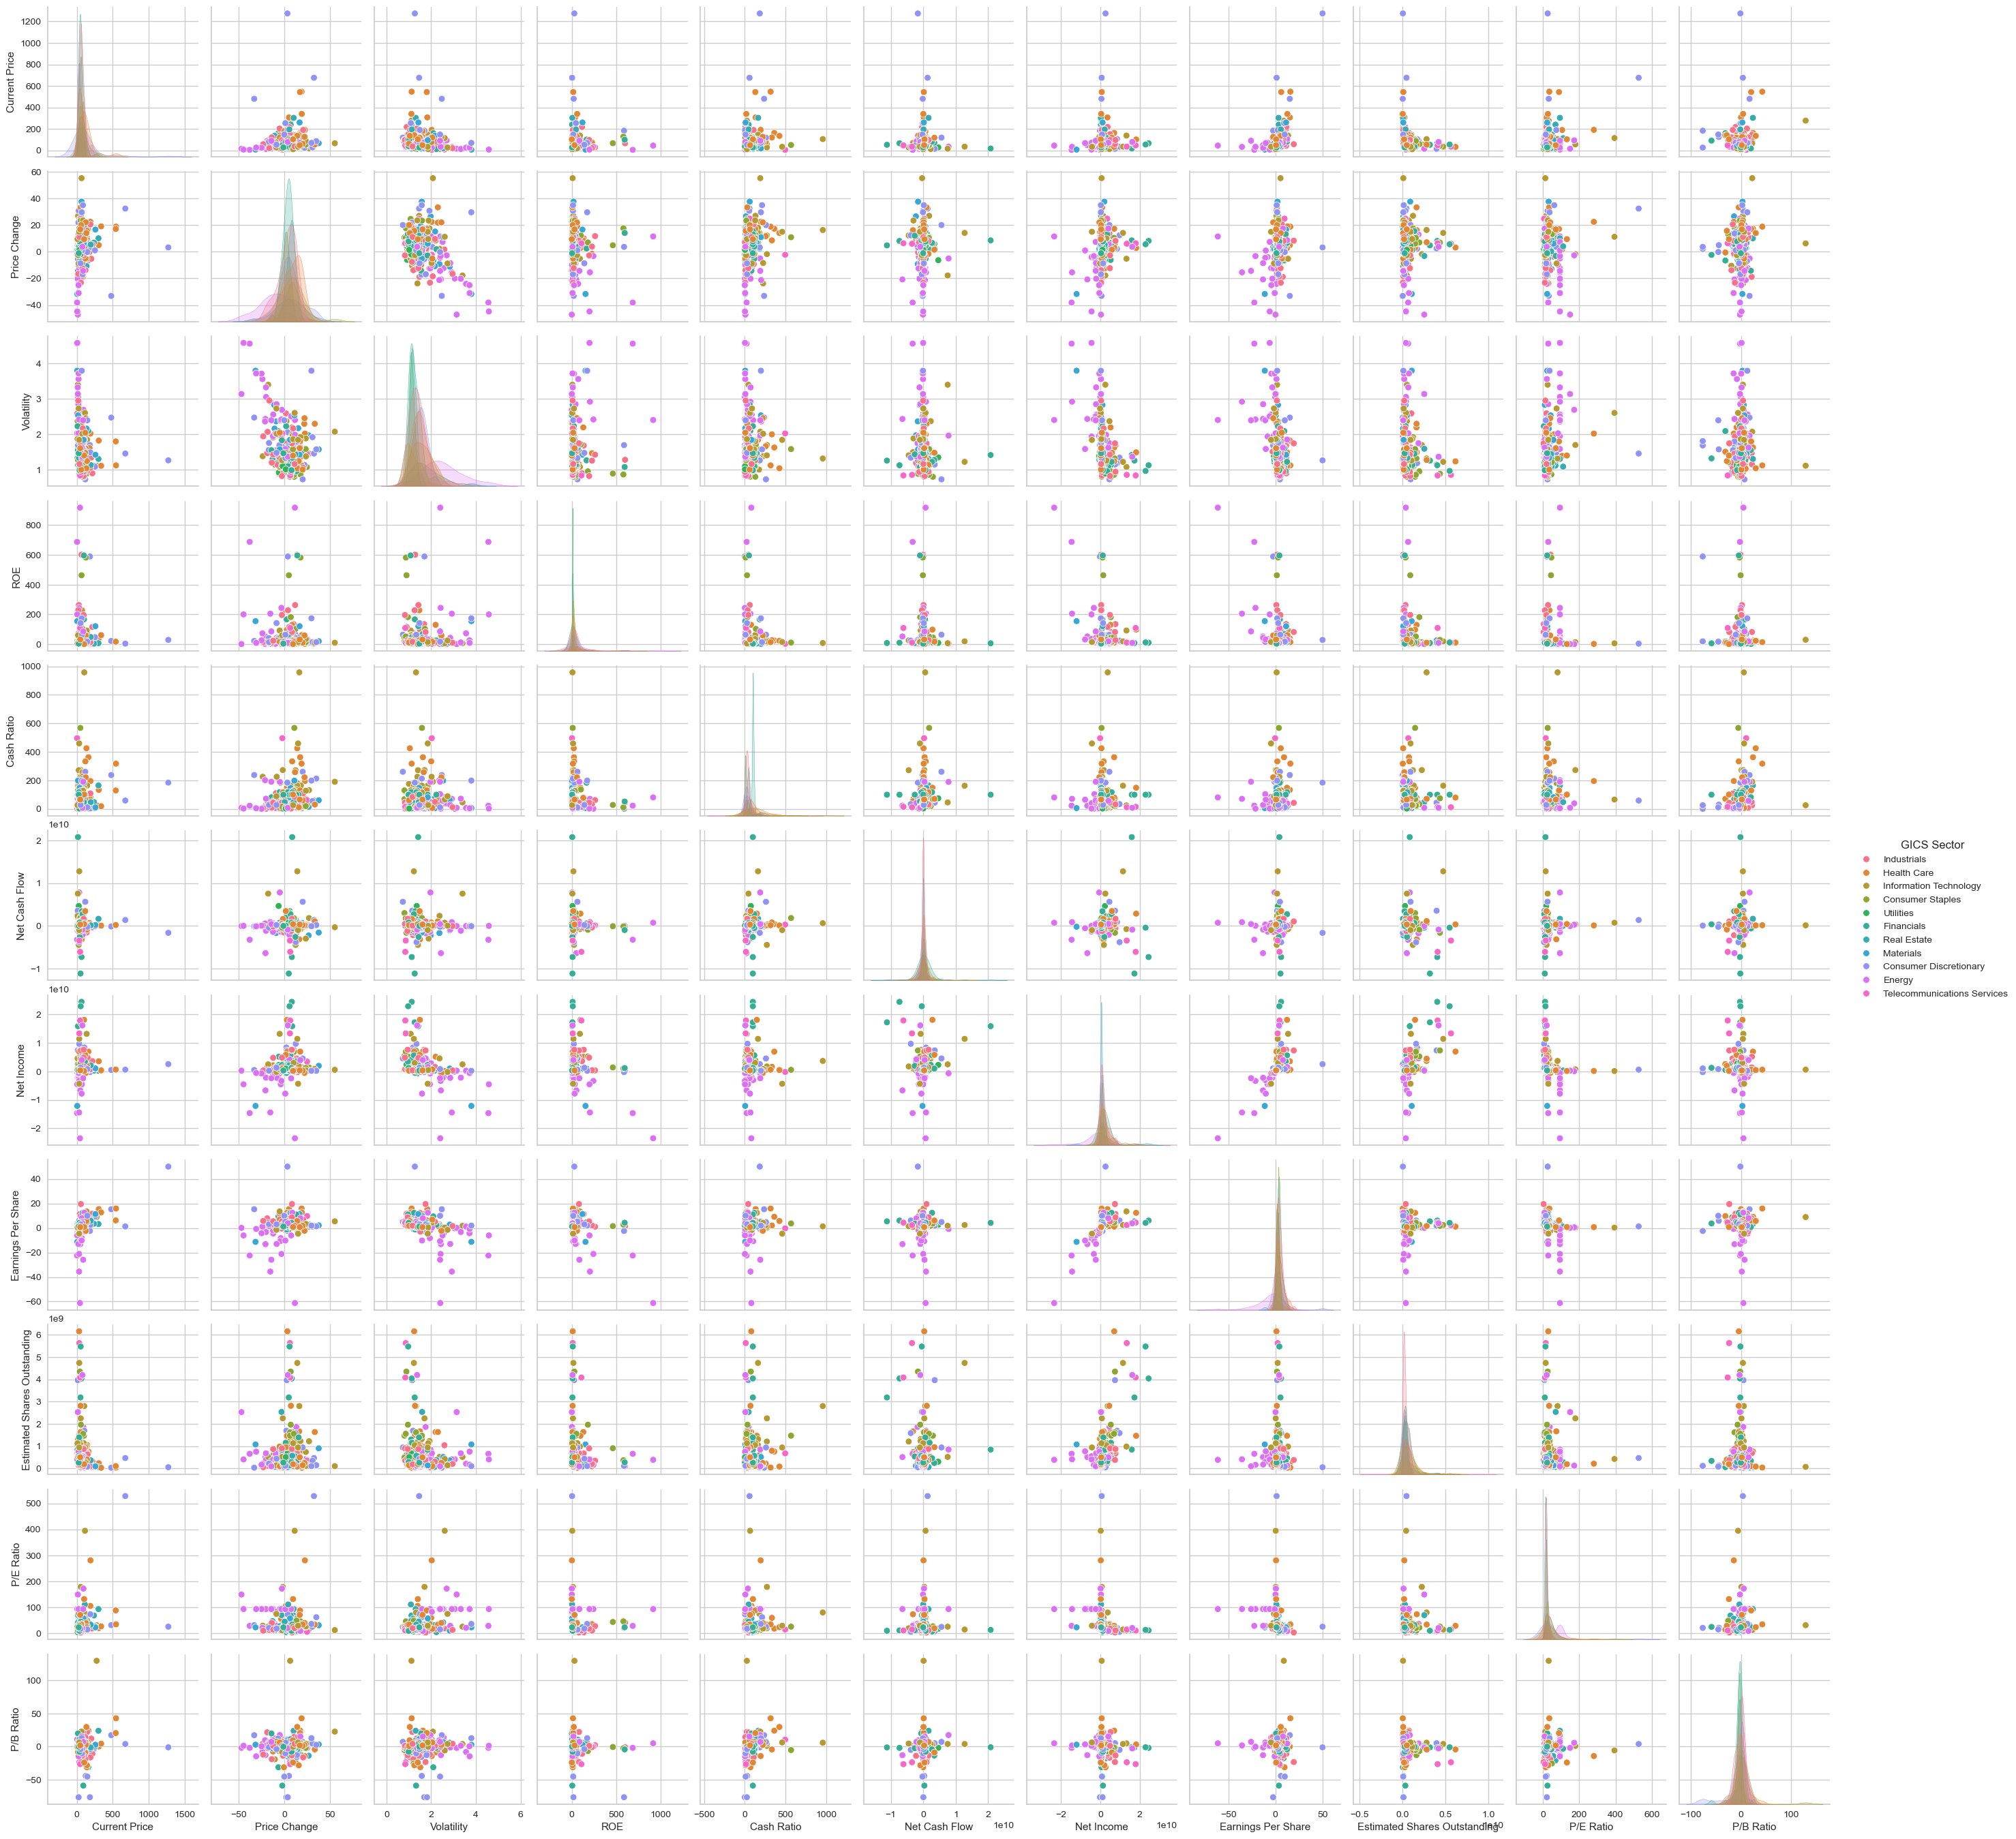

In [111]:
 #Create the pairplot
sns.pairplot(df_stock, hue="GICS Sector", diag_kind="kde")  # 'hue' for categorical color, 'diag_kind' for distribution type

# Show the plot
plt.show()

## a pair plot to show different sectors and their comparison with all the numerical variables


## Normalizing the data

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaled_df = pd.DataFrame(scaler.fit_transform (num_col), columns=num_col.columns)

# K-Means Clustering

In [126]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

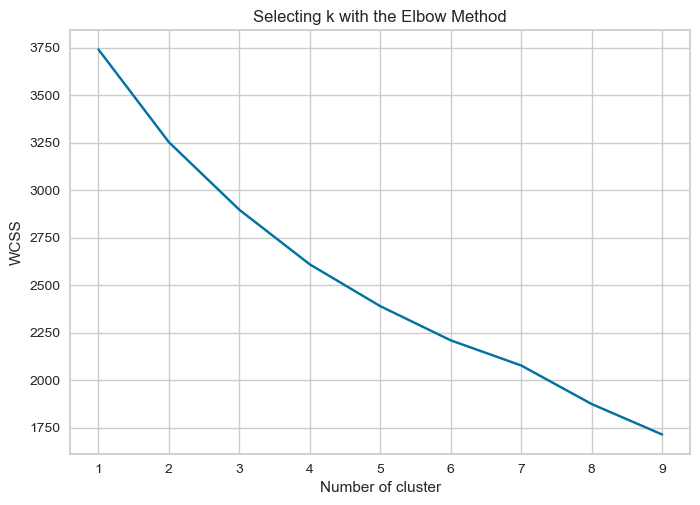

In [130]:
WCSS = {}

# iterate for a range of Ks and fit the scaled data to the algorithm,using inertia attribute from the clustering object

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=1000).fit(scaled_df)
    WCSS[k] = kmeans.inertia_

# Plot WCSS for different number of clusters
plt.figure()
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.title("Selecting k with the Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [132]:
# Uncomment the following code to install kneed
!pip install kneed


In [133]:
from kneed import KneeLocator

In [136]:
k_values = list(WCSS.keys())
wcss_values = list(WCSS.values())
k1 = KneeLocator(k_values, wcss_values, curve="convex", direction="decreasing")

# Find the elbow point
elbow_point = k1.elbow
print("Elbow point at:", elbow_point)

Elbow point at: 4


Number of Clusters: 1 	Average Distortion: 5.887920700424354
Number of Clusters: 2 	Average Distortion: 5.526545209467102
Number of Clusters: 3 	Average Distortion: 5.2268231521995085
Number of Clusters: 4 	Average Distortion: 5.042952370294678
Number of Clusters: 5 	Average Distortion: 4.9378353817267495
Number of Clusters: 6 	Average Distortion: 4.874654296090638
Number of Clusters: 7 	Average Distortion: 4.584223105270656
Number of Clusters: 8 	Average Distortion: 4.567130234254617
Number of Clusters: 9 	Average Distortion: 4.572655504727769


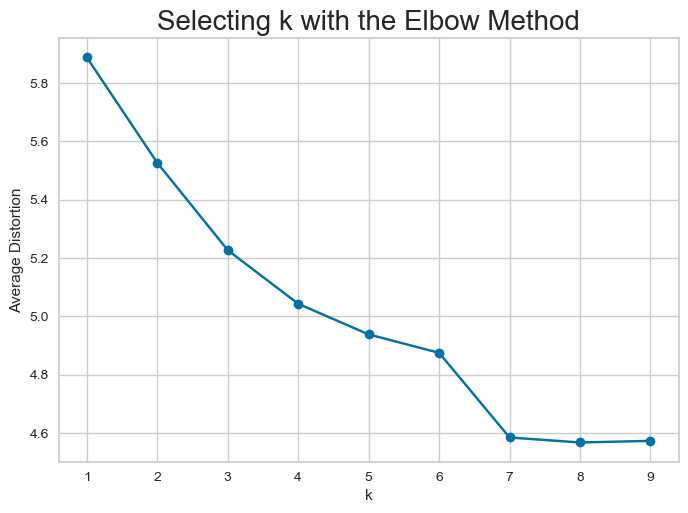

In [380]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(scaled_df)
    distortion = (
        sum(
            np.min(cdist(scaled_df, model.cluster_centers_, "Cityblock"), axis=1)
        )
        / scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-", marker="o")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

In [140]:
# 4 or 5 seems to be a good number of clusters 

Using the Silhouette method

In [386]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range (2, 11):
    kmeans = KMeans (n_clusters = k, random_state=1)
    kmeans.fit (scaled_df)
    score = silhouette_score (scaled_df, kmeans.labels_)
    silhouette_coefficients.append (score)

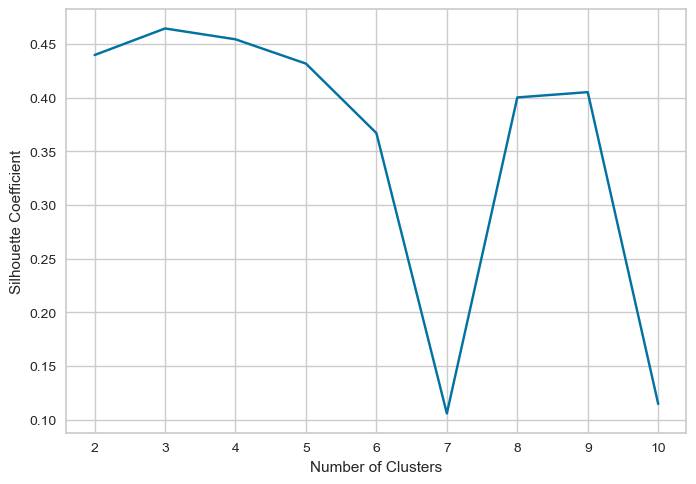

In [387]:
# Plotting the results:
plt.plot (range (2, 11), silhouette_coefficients)
plt.xticks (range (2, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Silhouette Coefficient")
plt.grid(True)
plt.show ()

# looking at both the elbow meathod and the Silhouette Coefficient we can decide 3 is a good number of clusters 

In [391]:
scaled_dfK=scaled_df.copy()

In [393]:
kmeans = KMeans (n_clusters = 3, random_state=1)
kmeans = kmeans.fit (scaled_dfK)
scaled_dfK["kmeans_clusters"] = kmeans.labels_

Note: K-means clustering results depend on how the initialization process (how the initial centroids are chosen). Since K-means uses reandom initialization, we might get different results everytime a different random _state parameter is chosen. If the dataset has clear, well-separated clusters, the impact of random initialization is minimal. If clusters are overlapping or not well-defined, different runs may yield different results.

We can use a variation of K-means, called K-Means++ which selects initial points in a more strategic way, reducing variance.

In [398]:
kmeans = KMeans (n_clusters = 3, init='k-means++', n_init=100, random_state=1)
kmeans = kmeans.fit (scaled_dfK)
scaled_dfK["kmeans_clusters"] = kmeans.labels_

In [400]:
scaled_dfK.sample(7)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,kmeans_clusters
204,-0.333491,-0.226172,-0.655454,-0.327752,0.320933,0.971681,0.969821,0.278704,0.680573,-0.500297,-0.011879,0
234,-0.298561,0.362229,-0.713108,-0.369243,-0.255000,-0.009825,-0.307705,-0.256406,-0.374959,0.333181,-0.161701,0
171,4.752261,1.222389,-0.676846,-0.265515,2.735422,0.030235,-0.230174,1.990449,-0.639266,0.040694,3.178303,0
137,-0.778181,-0.532123,0.847552,-0.379616,4.717961,0.102116,-0.429648,-0.466194,0.117018,-0.408585,0.875924,0
64,1.044192,-0.040012,0.291010,5.698878,-0.775555,-0.027547,-0.448710,-0.791516,-0.551152,-0.266300,-5.334786,0
119,-0.542252,-0.874323,-0.295098,-0.317379,0.044042,2.350636,0.196885,-0.013934,-0.328131,-0.345490,0.000170,0
284,-0.753261,-4.076877,5.168258,1.663837,-0.753404,-0.048128,-1.537835,-1.344869,-0.207063,1.365673,0.214520,2


We can visualize the clusters in 2-dimensions by choosing any two features. As an example, let us visualize the clusters based on "price change" and "volattily"
Rationale:
* Price Change:
This metric serves as a primary indicator of market momentum. It captures the dynamic shifts in value over time, offering insight into how the stock is trending relative to its current price.
* Volatility:
Volatility measures the degree of variation in price fluctuations and is essential for understanding the underlying risk profile. 

These two features collectively provide a comprehensive snapshot of both the momentum and the risk inherent in the stock’s performance, thereby facilitating a more informed and nuanced visualization for strategic decision-making.

Text(0, 0.5, 'Volatilty')

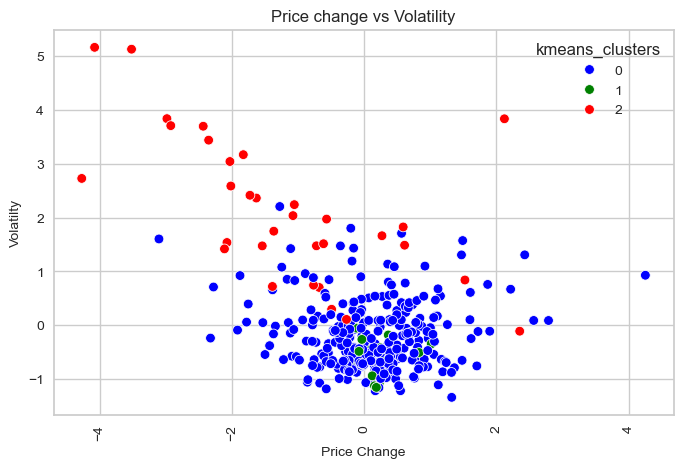

In [403]:
fig = plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(x='Price Change', y='Volatility', data=scaled_dfK, hue='kmeans_clusters', palette=['blue', 'green', 'red','purple'])
plt.title('Price change vs Volatility', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Price Change', fontsize=10)
plt.ylabel('Volatilty', fontsize=10)

# we can clearly see even though we did the follow the best  practicse the  clusters still overlap 

In [405]:
k_meansclusterprofile = scaled_dfK.groupby("kmeans_clusters").mean()

In [407]:
k_meansclusterprofile["count_in_each_segment"] = (
    scaled_dfK.groupby("kmeans_clusters")["Price Change"].count().values
)


In [409]:
scaled_dfK.kmeans_clusters.value_counts ()

kmeans_clusters
0    294
2     32
1     14
Name: count, dtype: int64

In [411]:
# let's display cluster profiles
k_meansclusterprofile.style.highlight_max(color="green", axis=0).highlight_min(color="red")

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
kmeans_clusters,,,,,,,,,,,,
0,0.032509,0.122140,-0.205984,-0.057634,-0.037820,-0.023071,-0.012467,0.169257,-0.177387,-0.180628,-0.021145,294
1,-0.293323,0.225363,-0.593683,-0.139559,0.776616,0.362618,3.018134,0.150899,3.861986,-0.270027,-0.129856,14
2,-0.170348,-1.220756,2.152210,0.590570,0.007700,0.053323,-1.205889,-1.621070,-0.059873,1.777654,0.251083,32


# Hierarchical Clustering
#### Please note that we will be using two libraries. We will use the scipy library to perform and visualize hierarchical clustering. Once we decide on number of clusters we need, we will use scikit-learn library's functionality to create clusters and profiles.

In [183]:
# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.cluster import AgglomerativeClustering
# to compute distances
from scipy.spatial.distance import pdist

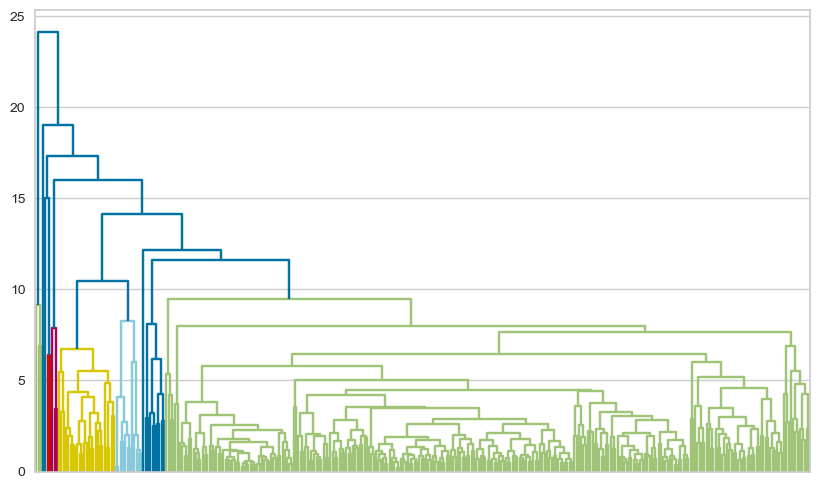

In [186]:
# Hierarchical clustering using complete linkage and Euclidean distance
Z = linkage(scaled_df, metric="euclidean", method="complete")
fig = plt.figure(figsize=(10, 6))
dendrogram(Z, no_labels=True, color_threshold=10)
plt.show()

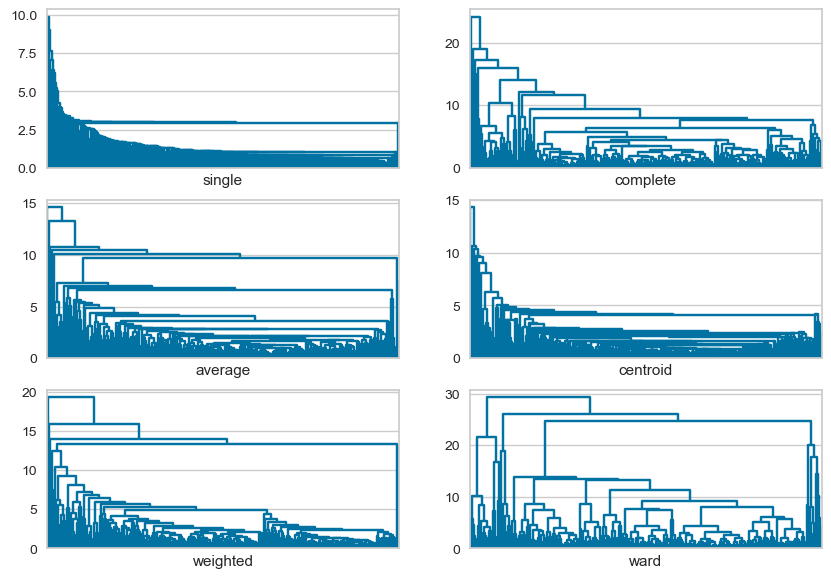

In [188]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 7), squeeze=False)
for i, method in enumerate(
    ["single", "complete", "average", "centroid", "weighted", "ward"]
):
    ax = axes[i // 2, i % 2]
    Z = linkage(scaled_df, method=method)
    dendrogram(Z, color_threshold=0, ax=ax, no_labels=True)
    ax.set_xlabel(method)

We can decide which method provides well defined clusters through a visual inspection of the various dendrograms. Or, we can use Cophenetic correlation
Using Cophenetic Correlation
The following code shows how to use cophenetic correlation coefficient to evaluate the quality of different clustering solutions based on different distance metrics and linkage methods, and how to choose the best combination for the given dataset. Specifically, the code performs the following functions:

Sets up a list of Distance Metrics and Linkage Methods
Initializing Variables for Tracking the Best Result
Iterating Over Combinations and Calculating Cophenetic Correlation
Finding and Storing the Best Combination

In [191]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted",]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560813.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.93382655280305.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correlati

In [193]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print("Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(high_cophenet_corr, high_dm_lm[0], high_dm_lm[1]))

Highest cophenetic correlation is 0.9422540609560813, which is obtained with euclidean distance and average linkage.


<function matplotlib.pyplot.show(close=None, block=None)>

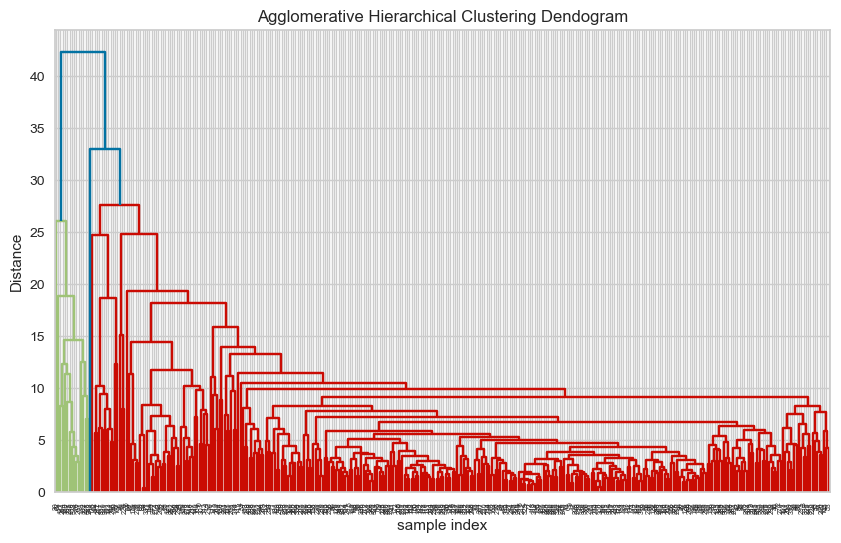

In [195]:
# Let us visualze the dendrogram
plt.figure(figsize=(10, 6))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(Z,leaf_rotation=90.0, leaf_font_size=5.0)
plt.tight_layout
plt.show

In [197]:
scaled_dfH=scaled_df.copy()

In [199]:
# using agglomerative functionality of skleran library
stock_model = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
stock_model.fit(scaled_dfH)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [201]:
# adding hierarchical cluster labels to the original dataframes
scaled_dfH["Clusters"] = stock_model.labels_

In [203]:
# Count the number of cereals in each cluster
stocks_per_cluster = scaled_dfH["Clusters"].value_counts()
print(stocks_per_cluster)

Clusters
0    334
2      2
1      2
3      1
4      1
Name: count, dtype: int64


this shows that the hirarcial clustering also couldnt make good clusters 

In [271]:
# Creating cluster profiles
cluster_profile_H = scaled_dfH.groupby("Clusters").mean()

In [273]:
# Displaying cluster profiles


# apply the styling
cluster_profile_H.round(2).style.highlight_max(color="green", axis=0).highlight_min(color="red", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
Clusters,,,,,,,,,,,
0,-0.030000,0.000000,-0.020000,-0.040000,-0.040000,-0.050000,0.010000,0.020000,-0.020000,-0.000000,-0.000000
1,-0.560000,0.600000,-0.340000,-0.280000,0.670000,8.590000,3.090000,0.080000,2.620000,-0.430000,0.230000
2,-0.580000,-1.450000,3.310000,7.910000,-0.210000,-0.690000,-5.240000,-6.780000,-0.070000,0.640000,0.240000
3,0.240000,1.010000,-0.350000,-0.330000,9.830000,0.280000,0.550000,-0.220000,2.630000,1.070000,0.550000
4,12.200000,-0.070000,-0.440000,-0.110000,1.260000,-0.890000,0.270000,7.190000,-0.620000,-0.160000,0.050000


## lets us now use pca

# Principal Components Analysis (PCA)

In [212]:
scaled_df.head(5)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


# as we made a copy of the dataset for kmeans and hirarchical we willnow make one for pca 



In [215]:
scaled_dfP = scaled_df.copy()

In [217]:
scaled_dfP.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


In [219]:
from sklearn.decomposition import PCA
mypca=PCA()
mypca.fit(scaled_dfP)
print(mypca.components_)

[[-0.18335823 -0.27666842  0.42919618  0.30106508 -0.08417114 -0.03368814
  -0.51091003 -0.5033668  -0.22120756  0.20815091 -0.00991673]
 [ 0.5774047   0.18815749  0.04101083 -0.06258117  0.32773726  0.1280034
  -0.25155831  0.18433241 -0.36327549  0.37736302  0.360796  ]
 [-0.17770732  0.04646452  0.18283759  0.00473711  0.53919175  0.1855024
   0.20918754 -0.27531285  0.58166569  0.24934832  0.2959799 ]
 [-0.00900284  0.65971773 -0.38664453  0.53431652  0.0838151  -0.13655589
  -0.12101272 -0.26011429  0.02333621 -0.00303257 -0.14551133]
 [ 0.39287414 -0.12202474  0.14571667  0.12446023 -0.1588855  -0.56275703
   0.17221048  0.06902206  0.32807051  0.47228787 -0.29493986]
 [ 0.04539895  0.07374983 -0.01301984 -0.04924358 -0.1433002   0.69439441
   0.07660902 -0.02703535  0.00607268  0.39241333 -0.571456  ]
 [ 0.34597383 -0.32918961  0.06740711  0.69551664 -0.04384053  0.31995867
   0.15598116  0.16995766  0.13220581 -0.30317218  0.12940702]
 [ 0.03785302 -0.10485332  0.17805858  0.00

In [221]:
print(mypca.explained_variance_ratio_)

[0.22770322 0.14358674 0.120947   0.10089366 0.09907929 0.08670985
 0.0749892  0.06503908 0.04391604 0.02568457 0.01145135]


In [223]:
print(np.cumsum(mypca.explained_variance_ratio_))

[0.22770322 0.37128996 0.49223695 0.59313061 0.6922099  0.77891975
 0.85390895 0.91894803 0.96286408 0.98854865 1.        ]


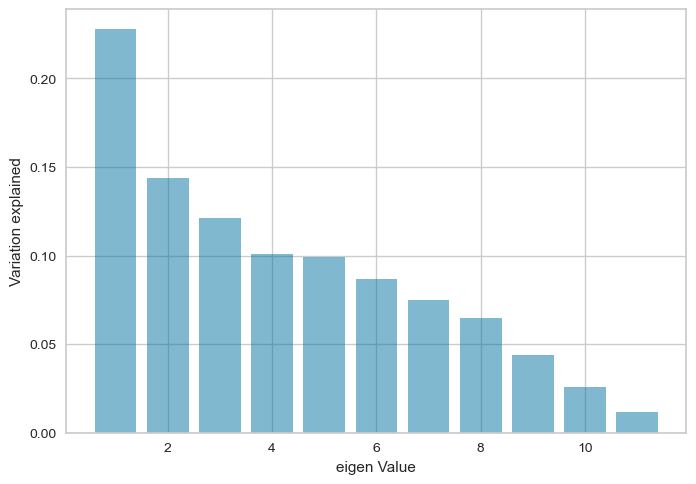

In [225]:
plt.bar(list(range(1,12)),mypca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.grid(True)
plt.show()

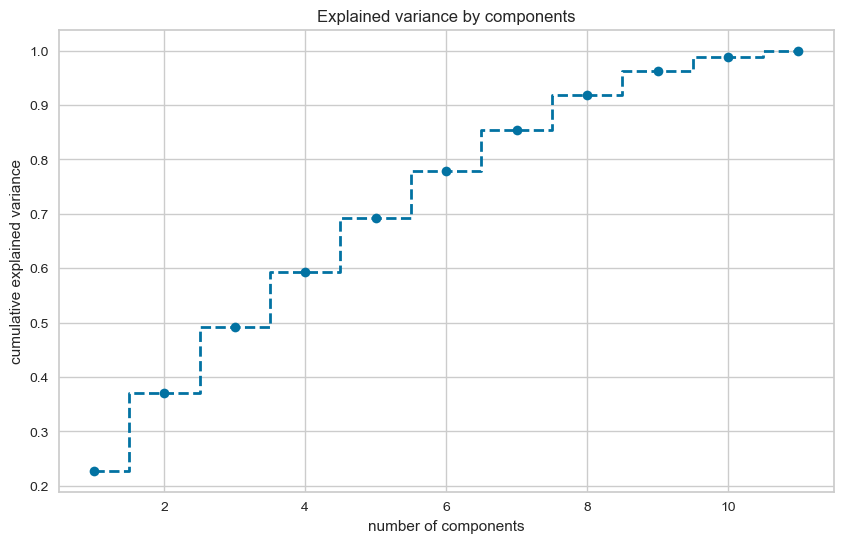

In [227]:
fig = plt.figure(figsize=(10,6))
plt.step(list(range(1,12)),mypca.explained_variance_ratio_.cumsum(),  where="mid",marker="o", linestyle = "--", linewidth=2)
plt.title('Explained variance by components')
plt.xlabel('number of components')
plt.ylabel("cumulative explained variance")
plt.grid(True)
plt.show()

lets take 7 componenets instead of 11 as they will explain almost 90% of the dataset 

In [346]:
mypca7=PCA(n_components=7, random_state=1)
pca7_df = pd.DataFrame(mypca7.fit_transform(scaled_dfP), columns=["PC1" , "PC2" , "PC3", "PC4", "PC5", "PC6" , "PC7" ])

In [348]:
pca7_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.208449,0.055819,-0.969567,0.275693,0.499324,-0.111435,0.809332
1,-0.155941,1.265974,-0.565343,0.076668,0.529538,0.120382,0.570302
2,-1.071839,0.687039,-0.513576,-0.694913,0.094947,0.204642,-0.014466
3,-0.123530,-0.017919,1.283338,-0.740974,0.475933,-0.146520,-0.985785
4,0.428389,2.841111,2.436738,0.165874,0.321388,0.631555,-1.590324


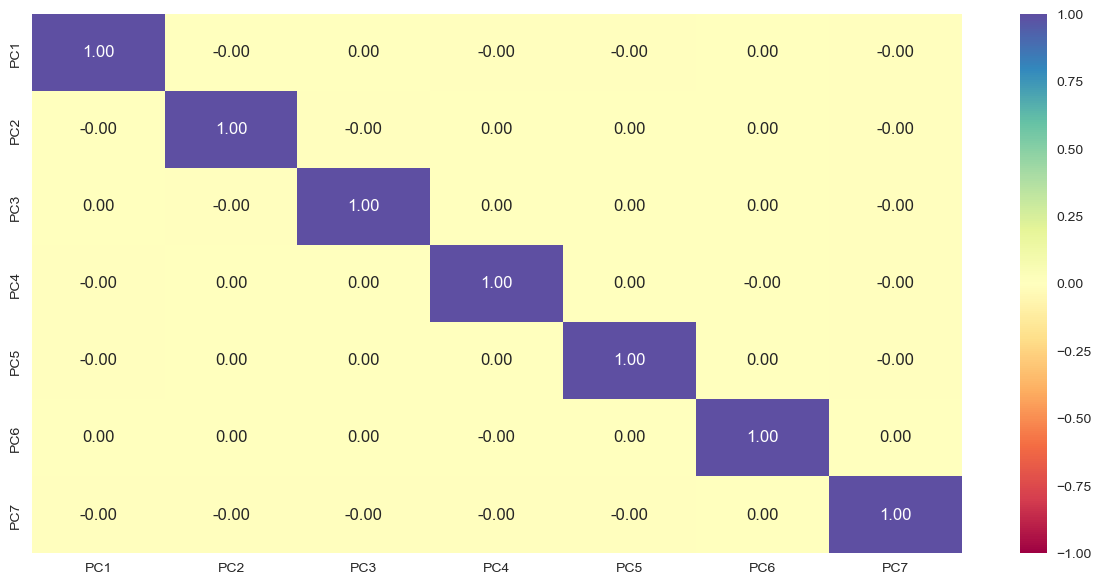

In [350]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    pca7_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

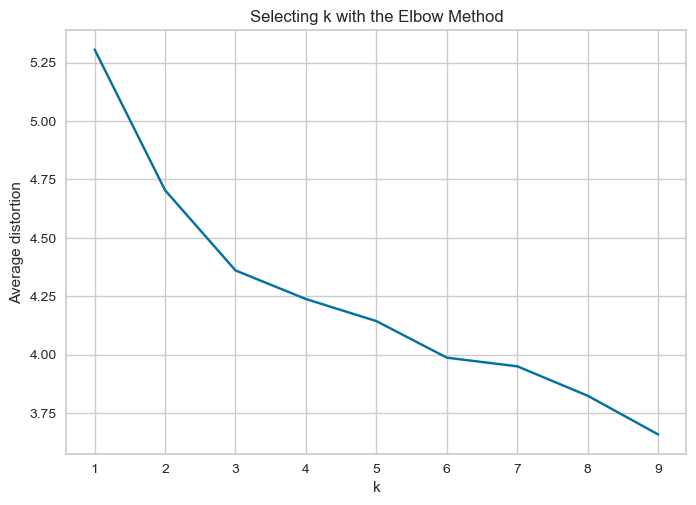

In [335]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(pca7_df)
    prediction = model.predict(pca7_df)
    distortion = (
        sum(
            np.min(cdist(pca7_df, model.cluster_centers_, "Cityblock"), axis=1)
        )
        / pca7_df.shape[0]
    )

    meanDistortions.append(distortion)

    #print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.grid(True)
plt.show()

## we decided to go for  a  cityblock distance because there are a lot of outliers in our data as we saw in the EDA

In [337]:
silhouette_coefficients = []
for k in range (2, 11):
    kmeans = KMeans (n_clusters = k, random_state=1)
    kmeans.fit (pca7_df)
    score = silhouette_score (pca7_df, kmeans.labels_)
    silhouette_coefficients.append (score)

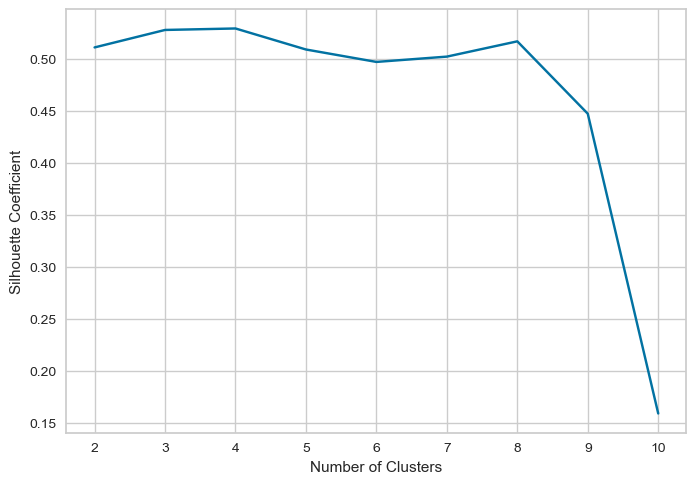

In [338]:
# Plotting the results:
plt.plot (range (2, 11), silhouette_coefficients)
plt.xticks (range (2, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Silhouette Coefficient")
plt.grid(True)
plt.show ()

3 or 4,5  clusteres are suggested 

lets make 3 


In [371]:
# Create a KMeans object with 3 clusters
kmeans_pca = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans algorithm on the PCA-transformed data
kmeans_pca.fit(pca7_df)

# Assign cluster labels to the PCA scores
pca7_df["PCA_kmeans_clusters"] = kmeans_pca.labels_

In [373]:
pca7_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PCA_kmeans_clusters
0,-1.208449,0.055819,-0.969567,0.275693,0.499324,-0.111435,0.809332,0
1,-0.155941,1.265974,-0.565343,0.076668,0.529538,0.120382,0.570302,0
2,-1.071839,0.687039,-0.513576,-0.694913,0.094947,0.204642,-0.014466,0
3,-0.123530,-0.017919,1.283338,-0.740974,0.475933,-0.146520,-0.985785,0
4,0.428389,2.841111,2.436738,0.165874,0.321388,0.631555,-1.590324,1
5,0.216654,0.140324,-0.543063,0.230125,-1.176535,-0.703093,0.302654,0
6,-1.147875,-0.396521,5.066684,-1.355789,-2.238836,-4.936783,2.770969,0
7,-0.047015,-0.661256,-0.680498,-0.219081,-0.301344,0.022513,-0.074175,0
8,-0.370278,-0.505343,-0.772018,0.021349,-0.111961,0.055960,-0.057749,0
9,-0.790994,-0.424430,-0.381220,-0.282307,-0.169195,-0.332232,-0.059512,0


In [375]:
pca7_df.PCA_kmeans_clusters.value_counts ()

PCA_kmeans_clusters
0    293
1     33
2     14
Name: count, dtype: int64

Text(0, 0.5, 'PC2')

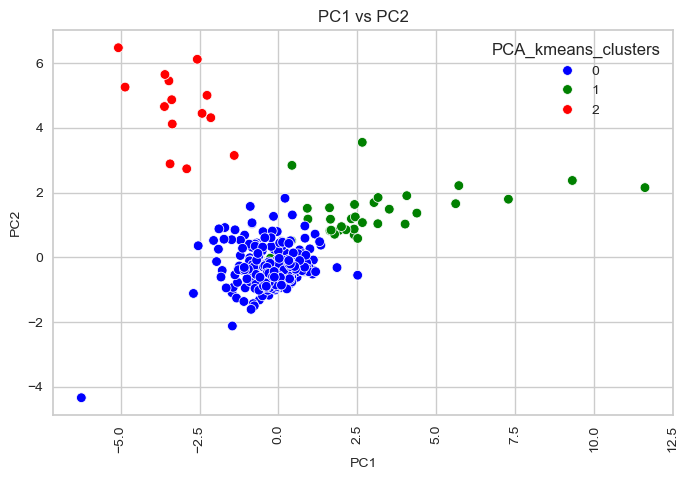

In [377]:
fig = plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(x='PC1', y='PC2', data=pca7_df, hue='PCA_kmeans_clusters', palette=['blue', 'green', 'red','purple'])
plt.title('PC1 vs PC2', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('PC1', fontsize=10)
plt.ylabel('PC2', fontsize=10)

### final modelling and recommendation 
Using PCA, I was able to reduce the data’s dimensions to its most important features. When I applied k-means clustering to these principal components, the clusters remained clearly defined with minimal overlap. This suggests that k-means is particularly effective at capturing the natural groupings within the data, making it a more reliable and actionable choice over other methods.

In [362]:
#Appending cluster lables based on PCA to the original data frame
scaled_dfP["PCA_kmeans_clusters"]=kmeans_pca.labels_

In [364]:
cluster_profile_P = scaled_dfP.groupby("PCA_kmeans_clusters").mean()

In [366]:
# let's display cluster profiles
cluster_profile_P.style.highlight_max(color="green", axis=0).highlight_min(color="red", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
PCA_kmeans_clusters,,,,,,,,,,,
0,-0.293323,0.225363,-0.593683,-0.139559,0.776616,0.362618,3.018134,0.150899,3.861986,-0.270027,-0.129856
1,-0.041701,-1.277816,2.135606,0.567143,0.063508,0.048168,-1.177194,-1.514256,-0.077646,1.722930,0.284583
2,0.018712,0.133150,-0.212162,-0.057208,-0.044261,-0.022752,-0.011626,0.163337,-0.175787,-0.181148,-0.025847


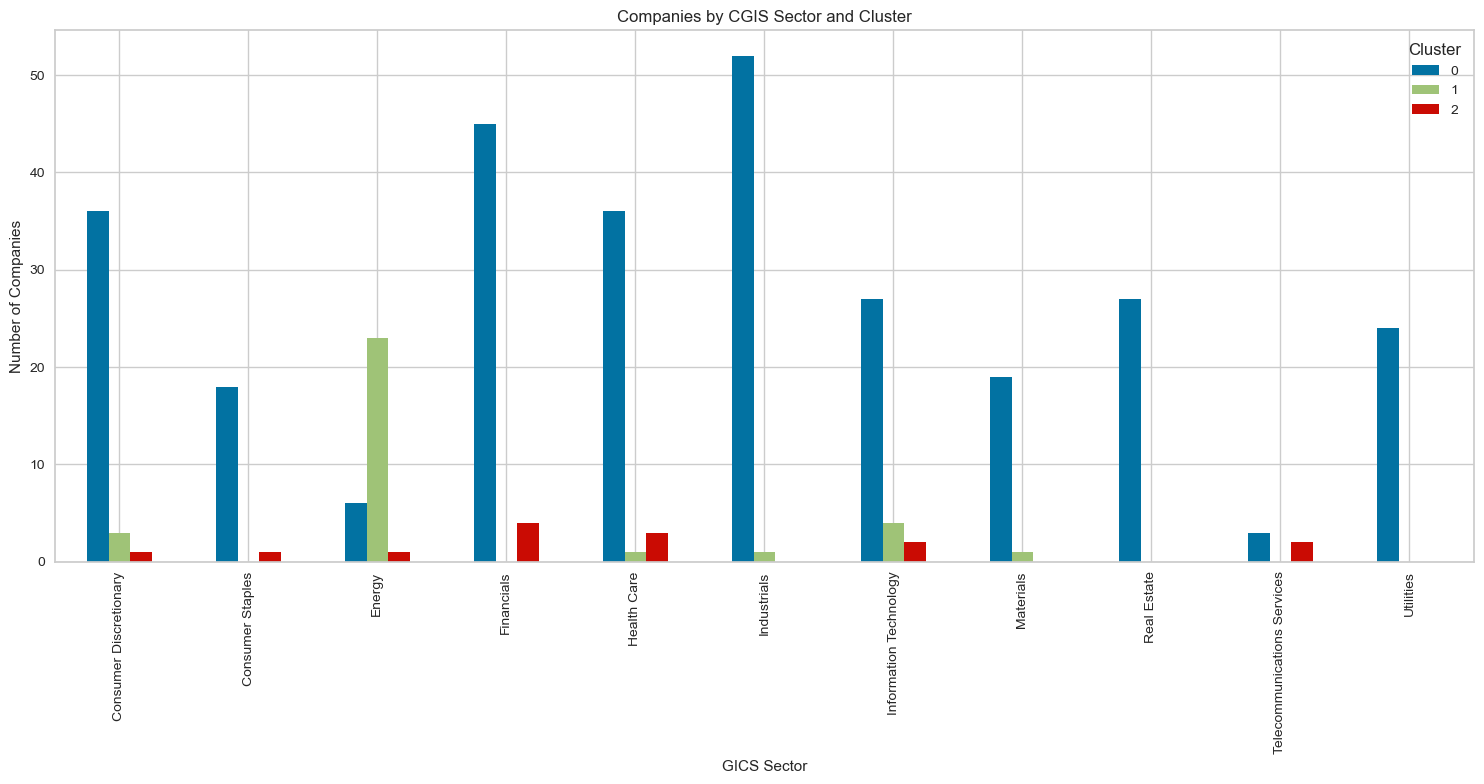

In [463]:

# Group data by CGIS sector and cluster, counting the number of companies in each group.
grouped_data = df_stock.groupby(['GICS Sector', 'PCA_kmeans_clusters']).size().unstack(fill_value=0)

# Create a bar chart to visualize the data.
ax = grouped_data.plot(kind='bar', figsize=(15, 8))
plt.title('Companies by CGIS Sector and Cluster')
plt.xlabel('GICS Sector')
plt.ylabel('Number of Companies')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

we can see cluster 0 represents all the GICS sector but cluster 1 represents energy sector primarily and financial sector is represented by cluster 2 

<Axes: xlabel='PCA_kmeans_clusters'>

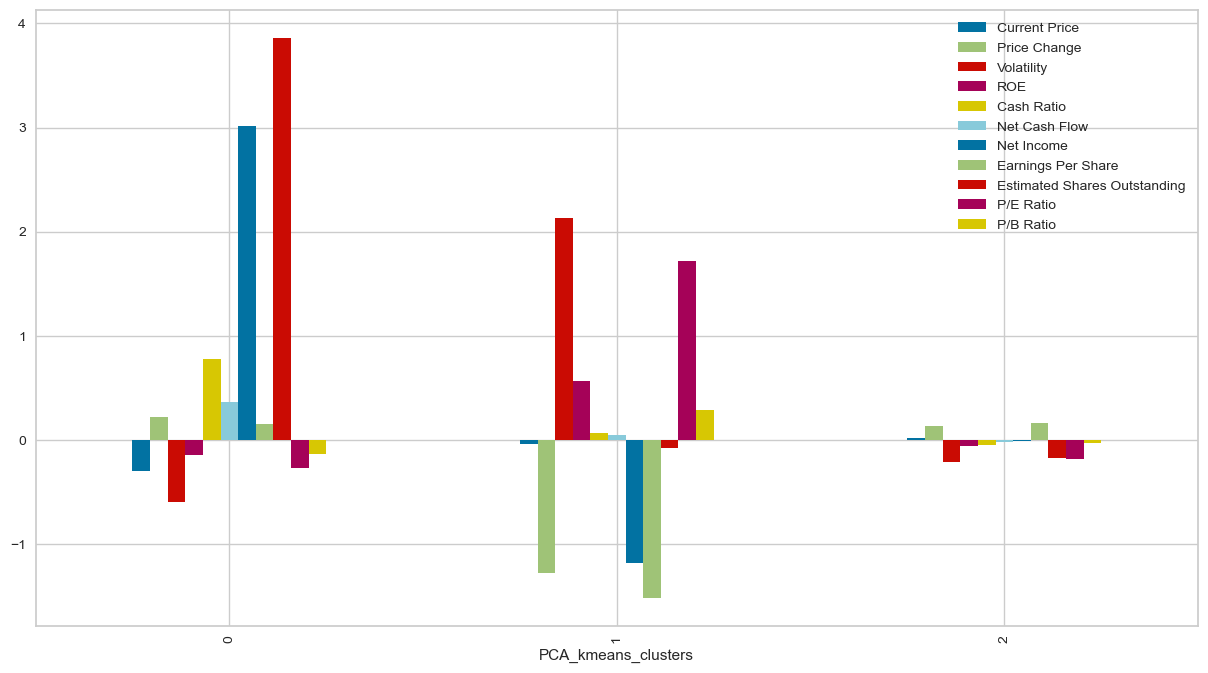

In [418]:
scaled_dfP.groupby("PCA_kmeans_clusters").mean().plot.bar(figsize=(15, 8))

In [432]:
df_stock["PCA_kmeans_clusters"]=kmeans_pca.labels_


# using Chatgpt for getting domain knowledge to make better recommendations 
### Detailed Analysis of Financial Metrics

## 1. Current Price
* **Definition:** The market value at which a security is trading at a given moment.
* **Context:** It’s the baseline figure that investors use to gauge valuation and compare against historical performance.
* **Implication:** While not inherently “good” or “bad,” its interpretation is relative to historical trends and industry benchmarks.

## 2. Price Change
* **Definition:** The difference between the current price and a previous reference point (often the prior closing price).
* **Context:** It reflects market sentiment and momentum over a specific period.
* **Implication:** A positive change signals bullish sentiment, while a negative change may indicate market pessimism or a correction.
* **Relation to Current Price:** It’s a dynamic performance indicator, rather than a static value like current price. Together, they offer a snapshot of market behavior.

## 3. Volatility
* **Definition:** A measure of the price fluctuations over a period—typically expressed as a standard deviation or percentage change.
* **Context:** It quantifies the risk level associated with the asset.
* **Implication:**
  * **High Volatility:** Indicates greater uncertainty and risk, which could lead to higher returns but also higher potential losses.
  * **Low Volatility:** Suggests stability and predictability, often preferred by risk-averse investors.

## 4. ROE (Return on Equity)
* **Definition:** A profitability measure calculated as Net Income divided by Shareholders’ Equity.
* **Context:** It gauges how effectively management is using equity capital to generate profit.
* **Implication:**
  * **High ROE:** Generally signals efficient use of capital and strong operational performance.
  * **Low ROE:** May indicate inefficiencies or potential issues in generating returns for shareholders.

## 5. Cash Ratio
* **Definition:** A liquidity metric that compares a company’s cash and cash equivalents to its current liabilities.
* **Context:** It assesses the company's ability to meet short-term obligations without needing to liquidate other assets.
* **Implication:**
  * **High Cash Ratio:** Indicates robust liquidity and financial resilience.
  * **Excessively High Ratios:** Could imply underutilized capital that might otherwise be invested for growth.
  * **Low Cash Ratio:** Signals potential liquidity constraints and may warrant a review of short-term financial strategies.

## 6. Net Cash Flow
* **Definition:** The net difference between cash inflows (from operations, investing, and financing) and outflows over a given period.
* **Context:** It is a critical indicator of a company’s liquidity and operational efficiency.
* **Implication:**
  * **High Net Cash Flow:** Generally positive, suggesting the company is generating ample cash to reinvest, service debt, or return capital to shareholders.
  * **Low Net Cash Flow:** May raise concerns, indicating that the company could be struggling to generate sufficient cash from operations. However, it might also reflect significant reinvestments in future growth.
  * **Interpretation Nuance:** It’s important to consider whether low net cash flow is due to short-term operational issues or deliberate capital expenditures aimed at long-term expansion.

## 7. Net Income
* **Definition:** The profit remaining after all expenses, taxes, and costs have been deducted from total revenue.
* **Context:** It is the bottom line that reflects the overall profitability of the business.
* **Implication:**
  * **Positive Net Income:** Signals financial health and successful operations.
  * **Negative Net Income:** Could be a red flag, warranting further investigation into cost structure and revenue strategies.

## 8. Earnings Per Share (EPS)
* **Definition:** Calculated as Net Income divided by the Estimated Shares Outstanding.
* **Context:** It provides a per-share profitability metric, essential for comparing performance across companies of different sizes.
* **Implication:**
  * **Higher EPS:** Typically indicates stronger profitability and is attractive to investors.
  * **Lower EPS:** May suggest weaker performance or the impact of dilution from additional share issuance.

## 9. Estimated Shares Outstanding
* **Definition:** The total number of a company’s shares currently held by all shareholders.
* **Context:** This figure is crucial for calculating market capitalization and per-share metrics such as EPS and P/E Ratio.
* **Implication:** Changes in this number (due to buybacks or issuance) can significantly impact per-share metrics, influencing investor perceptions of value.

## 10. P/E Ratio (Price-to-Earnings Ratio)
* **Definition:** The ratio of the current share price to the Earnings Per Share.
* **Context:** It is used to determine market expectations regarding a company’s future earnings growth relative to its current earnings.
* **Implication:**
  * **High P/E Ratio:** Often implies high growth expectations, but can also suggest that the stock is overvalued.
  * **Low P/E Ratio:** Could indicate undervaluation or potential issues in future earnings potential.
* **Recommendation:** Analyze in the context of industry averages and historical trends for a balanced view.

## 11. P/B Ratio (Price-to-Book Ratio)
* **Definition:** The ratio of the stock’s market price to its book value per share.
* **Context:** It provides insight into whether a stock is valued appropriately relative to its net assets.
* **Implication:**
  * **High P/B Ratio:** May indicate overvaluation or strong market confidence in the company’s future prospects.
  * **Low P/B Ratio:** Could signal undervaluation or issues with asset quality.
* **Strategic Insight:** This ratio should be examined alongside other metrics to assess if market sentiment aligns with the company’s intrinsic asset value.

---

## Integrating the Metrics for Recommendations
* **Holistic Analysis:** Each metric must be analyzed in conjunction with the others. For instance, a company with high ROE and robust net cash flow but high volatility might be a growth opportunity for a risk-tolerant investor, while risk-averse stakeholders might prefer a lower volatility profile even if growth is moderate.
* **Contextual Benchmarking:** Compare these figures against industry peers and historical performance. Metrics like the P/E and P/B ratios should be interpreted in the context of the company’s sector norms and market cycles.
* **Strategic Intent:** Recognize that some “low” figures, such as net cash flow, may be strategic. A temporary dip in cash flow might signal a significant reinvestment in technology or market expansion, which could pay dividends in the long run. Conversely, persistently low net cash flow with declining net income may point to operational inefficiencies.
* **Risk Versus Reward:** Metrics like volatility, cash ratio, and price change are vital in assessing risk. A forward-thinking recommendation should balance these risk indicators with growth metrics (EPS, ROE) to align with the overall investment strategy.

---

This framework provides a comprehensive and data-driven approach to formulating investment recommendations based on key financial metrics.

In [453]:
# Set pandas option to display all rows
pd.set_option('display.max_rows', None)
# Filtering the DataFrame for cereals in cluster 1
Securities_in_cluster_0 = df_stock[df_stock["PCA_kmeans_clusters"] == 0]

print(Securities_in_cluster_0['Security'])





0                     American Airlines Group
1                                      AbbVie
2                         Abbott Laboratories
3                           Adobe Systems Inc
5                   Archer-Daniels-Midland Co
6                       Alliance Data Systems
7                                 Ameren Corp
8                     American Electric Power
9                                   AFLAC Inc
10         American International Group, Inc.
11                Apartment Investment & Mgmt
12                               Assurant Inc
13                  Arthur J. Gallagher & Co.
14                    Akamai Technologies Inc
15                             Albemarle Corp
16                       Alaska Air Group Inc
17                              Allstate Corp
18                                   Allegion
20                      Applied Materials Inc
21                                 AMETEK Inc
22              Affiliated Managers Group Inc
23                                

## RECOMMENDATIONS :

## Cluster 0: Stable Value-Driven Profiles
cluster membership :

*   **Overview:**  
  * **Current Price:** Below average  
  * **Price Change:** Moderately positive  
  * **Volatility:** Well below average (indicating stability)  
  * **Net Income & Cash Flow:** Strong positive signals  
  * **Liquidity (Cash Ratio):** Significantly above average  
  * **Valuation (P/E & P/B):** Relatively low, suggesting potential undervaluation
*   **Strategic Insights:**  
* The stability reflected in low volatility, high net income, and strong liquidity indicates these companies could be attractive for risk-averse investors.
* The lower valuation metrics suggest potential for value-based re-rating, especially if operational improvements are realized.
*   **Recommendations:**  
* Consider recommending these stocks for portfolios focused on stable, income-generating investments.



In [483]:
# Filtering the DataFrame for cereals in cluster 1
Securities_in_cluster_1 = df_stock[df_stock["PCA_kmeans_clusters"] == 1]

print(Securities_in_cluster_1['Security'])

4             Analog Devices, Inc.
19         Alexion Pharmaceuticals
26                  Amazon.com Inc
30              Apache Corporation
31         Anadarko Petroleum Corp
44                Baker Hughes Inc
62               Chesapeake Energy
70          Chipotle Mexican Grill
76                 Cabot Oil & Gas
84                Concho Resources
102             Devon Energy Corp.
109                  EOG Resources
112                EQT Corporation
127      Freeport-McMoran Cp & Gld
147                Halliburton Co.
153               Hess Corporation
157     Hewlett Packard Enterprise
180                  Kinder Morgan
216             Marathon Oil Corp.
219                     Murphy Oil
222               Noble Energy Inc
226                   Netflix Inc.
227        Newfield Exploration Co
229    National Oilwell Varco Inc.
235                          ONEOK
238           Occidental Petroleum
259           Quanta Services Inc.
267          Range Resources Corp.
284            South

# Cluster 1: High-Growth Yet Speculative Profiles
* **Overview:**  
* **Current Price:** Near average  
* **Price Change:** Significantly negative, indicating downward price pressure  
* **Volatility:** Extremely high, reflecting market uncertainty  
* **Profitability:** Despite a high ROE, net income and EPS are negative  
* **Liquidity:** Very low cash ratio, indicating potential cash constraints  
* **Valuation:** Elevated P/E and modestly positive P/B ratios suggest high expectations amidst current losses
* **Strategic Insights:**  
* This cluster represents companies that might be in aggressive growth phases but are currently facing operational challenges.
* The high volatility and negative profitability metrics require investors to exercise a higher risk tolerance.
* **Recommendations:**  
* **Speculative/High-Risk:** These stocks may appeal to aggressive investors or those with a short-term speculative focus.


In [451]:
# Filtering the DataFrame for cereals in cluster 1
Securities_in_cluster_2 = df_stock[df_stock["PCA_kmeans_clusters"] == 2]

print(Securities_in_cluster_2['Security'])

40       Bank of America Corp
52             Citigroup Inc.
123                Ford Motor
125                  Facebook
140           Gilead Sciences
167               Intel Corp.
177      JPMorgan Chase & Co.
181         Coca Cola Company
215               Merck & Co.
246               Pfizer Inc.
287                  AT&T Inc
317    Verizon Communications
320               Wells Fargo
331         Exxon Mobil Corp.
Name: Security, dtype: object


## Cluster 2: Neutral, Market-Average Profiles

* **Overview:**  
* **Current Price & Price Change:** Slightly above or near average, indicating moderate market sentiment  
* **Volatility:** Mildly below average, offering a measure of stability  
* **Profitability & Liquidity:** Metrics hover close to the overall market average with minor deviations
* **Valuation:** Both P/E and P/B ratios are marginally below average, suggesting fair market pricing
* **Strategic Insights:**  
* Companies in this cluster represent a balanced profile with no extreme performance indicators.
* They may be suited for investors looking for steady, non-speculative exposures.
* **Recommendations:**  
* **Balanced Exposure:** Recommend these stocks for investors seeking a diversified, risk-mitigated portfolio.
